In [1]:
#[E-07] Camera Sticker App

In [2]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할수 있도록 하는 lib
import numpy as np # 다차원 배열을 쉽게 처리 , 효율적으로 사용할수 있도록 하는 lib
import dlib #이미지 처리 및 기계학습 , 얼굴 인식등을 할수있는 c++로 개발된 고성능 lib

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


# Step 1. 스티커 구하기 or 만들기

(1) 고양이 수염 이미지를 다운로드 받아주세요.

(2) 여러분의 셀카 이미지도 촬영해 주세요.

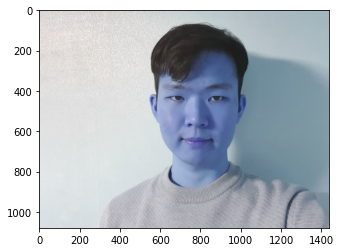

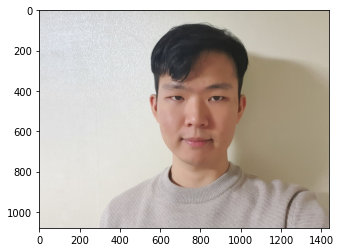

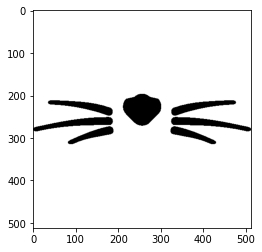

In [3]:
face_image_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/image4.png'
sticker_image_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/24674.png'

img_bgr = cv2.imread(face_image_path, 1)
img_show = img_bgr.copy()
plt.imshow(img_show)
plt.show()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

stk_img_bgr = cv2.imread(sticker_image_path, 1)
stk_img_rgb = cv2.cvtColor(stk_img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(stk_img_rgb)
plt.show()

# Step 2. 얼굴 검출 & 랜드마크 검출 하기

오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

* 여기서 주의할 점은, cv2는 BGR기반으로굴러가기때문에 cv2.rectangle할 때 넣는 img는 BGR값의 img를 넣어줘야한다.


In [4]:
detector_hog = dlib.get_frontal_face_detector() #기본 얼굴 감지기

rectangles[[(553, 297) (1016, 759)]]


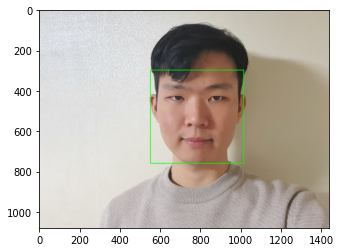

In [5]:
dlib_rects = detector_hog(img_rgb, 1) #num of image pyramid
print(dlib_rects)

#찾은 얼굴 영역 박스 리스트
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0),2, lineType=cv2.LINE_AA) #시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
img_show_rgb = cv2.cvtColor(img_show ,cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


얼굴은 dlib.get_frontal_face_detector을 통해 좌표를 얻어 rect로 만들어 얼굴검출하였다.

In [6]:
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


모델로부터 우리 이미지의 사각형 안에 적용하여 각 랜드마크 좌표를 얻는다.

In [7]:
list_landmarks=[]

for dlib_rect in dlib_rects: # 사각형 시작 -끝 좌표점 
    points = landmark_predictor(img_rgb, dlib_rect) #이미지에 대한 시작-끝 좌표점 제공해서 landmark predictor 돌린걸로 나온 점들.(lm)
        #모든 landmark의 위치정보를 points에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  #그  68개 랜드마크 각 점들의 x,y 좌표 리스트화
        #각각의 landmark 위치정보를 (x,y)형태로 변환해 리스트로 저장한다.
    list_landmarks.append(list_points) # 리스트에 추가.
        #list_landmarks에 랜드마크 점들의 리스트 저장
print(len(list_landmarks[0])) #첫번쨰 이미지의 랜드마크 좌표리스트
    

68


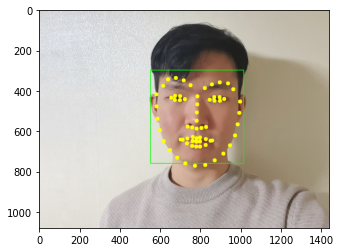

In [8]:
for landmark in list_landmarks: #랜드마크 좌표 별로
    for point in landmark: # x,y값 point
        cv2.circle(img_show, point, 10, (0,255,255), -1) # 두께 10의 노란색 색칠된 원 (중심으로 x,y)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
        
        

얼굴 검출(초록 사각형)에 랜드마크 검출(노란색 원) 완료

# Step 3. 스티커 적용 위치 확인하기

고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #시작 끝 좌표점과 랜드마크 좌표
    print(landmark[30])
    x = landmark[30][0] # 코에있는 랜드마크 좌표점 하나의 x
    y = landmark[30][1] # 코에있는 랜드마크 좌표점 하나의 y

    
    w = h = dlib_rect.width() # 사각형 얼굴 detection 의 가로길이 (정사각형 w, h)
    print(f'(x,y) : ({x}, {y})') # 코 좌표
    print(f'(w,h) : ({w}, {h})') # 사각형 x,y
    

(782, 548)
(x,y) : (782, 548)
(w,h) : (464, 464)


In [10]:
print(stk_img_rgb.shape)
img_sticker = cv2.resize(stk_img_rgb, (w,h))
print(img_sticker.shape)

(512, 512, 3)
(464, 464, 3)


In [11]:
refined_x = x - w // 2
refined_y = y - h // 2
print(f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (550,316)


(x,y) : (550,316) => 초록색 박스의 시작좌표 (스티커의 시작좌표가 될것이다)

In [12]:
if refined_x < 0 :
    img_sticker = img_sticker[:, -refined_x:]
    refined_x=0
#왕관 이미지 씌우기위해 왕관 이미지가 시작할 y값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
print(f'(x,y): ({refined_x}, {refined_y})')
    

(x,y): (550, 316)


스티커이미지가 원본 이미지의 사이즈를 넘어가는 경우 스티커를 잘라서 출력하기위해 다음의 x,y좌표를 통해 정제과정 거친다

In [13]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

스티커 영역을 초록색 박스와 노란색 랜드마크가 설정됬던 img_show으로 설정, 그리고 그 범위를 r_y : r_y + 스티커y  , r_x: r_x + 스티커x로

정함으로써 , 범위를 지정하고, 그 부분은 img_sticker가 255(흰색)인 부분, 스티커 범위 , 스티커를 넣는다

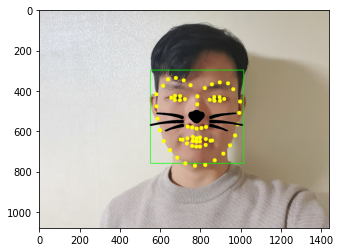

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
img_bgr2 = img_bgr.copy()
img_bgr3 = img_bgr.copy()

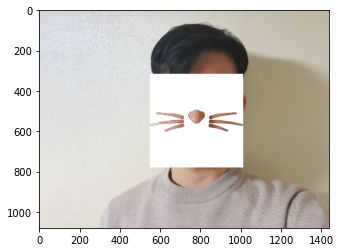

In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==0, sticker_area, img_sticker). astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

다음은 일부러 0으로 설정하였는데, np.where의 기능에 대해 제대로 이해하기 위함이다.
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
np.where(img_sticker==0, sticker_area, img_sticker). astype(np.uint8)

- np.where에서 np.where(조건, 참일경우수행, 거짓일경우수행)인 구조이다.
- img_sticker==0이라는 조건<<을 통해 참일경우에는 sticker_area로, 설정 => 기존 img_bgr 원본 데이터를 넣는것이다.
- img_sticker==0이 거짓일경우 즉 검정 이외에는 img_sticker로 설정 => 스티커 이미지의 데이터를 넣는것이다.

그 가져온 부분을 해당 영역 [refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] 안에 삽입한다.

np.where(a > 10, a * 2, b) # a가 10보다 크면 2배, 그렇지 않으면 b의 해당 위치 값으로 설정

이라는 예시를 살펴보면 이해가 될것이다.

맨 앞의 조건식이 참일경우 2번쨰인자, 거짓일경우 3번째 인자의 해당 위치값으로 설정한다.

- 고양이 수염 스티커를 제대로 붙이기 위해서는 조건을 수정할 필요가있다
- 고양이 수염 부분 검정 (img_sticker에서 0)을 보여줘야하고, 흰색부분은 원본을 보여줘야한다.  
- 기존 img_sticker==0에서 , 참인경우를 img_sticker 거짓인 경우를 sticker_area를 보여주면 될것 같다.
그 결과로 인해 img_sticker==0

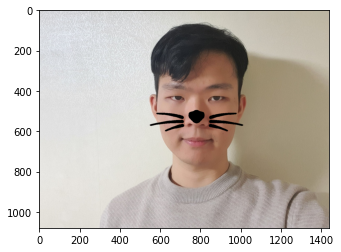

In [17]:
sticker_area = img_bgr2[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr2[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==0, img_sticker, sticker_area). astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

다음과 같이 성공적으로  원본 얼굴에 고양이 스티커를 붙이게 되었다.

아까 기존 np.where값을 바꿔서 img_sticker==255일때는 sticker_area, img_sticker로 쓰면 될것이다.

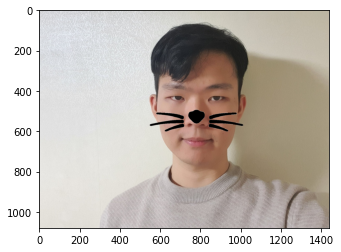

In [18]:
sticker_area = img_bgr3[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr3[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker). astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

동일하게 잘 적용되는 모습을 볼수 있다.

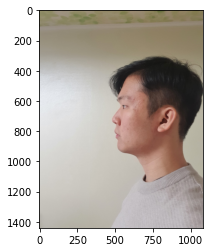

In [29]:
#옆모습 사진으로 해보자
side_face_image_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/image2.png'
img_side = cv2.imread(side_face_image_path,1)
img_side_show = img_side.copy()

img_side_rgb = cv2.cvtColor(img_side, cv2.COLOR_BGR2RGB)
plt.imshow(img_side_rgb)
plt.show()

rectangles[]


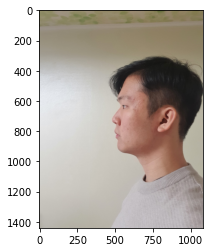

In [30]:
dlib_rects = detector_hog(img_side_rgb, 1) #num of image pyramid
print(dlib_rects)

#찾은 얼굴 영역 박스 리스트
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_side_show, (l,t), (r,b), (0,255,0),2, lineType=cv2.LINE_AA) #시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
img_side_show_rgb = cv2.cvtColor(img_side_show ,cv2.COLOR_BGR2RGB)
plt.imshow(img_side_show_rgb)
plt.show()


다음 옆모습을 통해서 landmark를 지정하기위한 얼굴 검출이 실패하였음을 볼수 있다.

그렇다면 어떻게 해야 이 옆모습 또한 지정할수 있을까? -> 아마 학습을 통해 진행해야 검출이 될 것 같다


<h2>회고</h2>
이번 exp에서는 이미지의 "영역"에 대해서 탐구한 느낌이다. 동시에 color영역에 대해서도 특정 "값"을 통해 이부분은 a로 저부분은 b로 지정해서

이미지를 편집해낼수 있단 것이 재미있었던 부분같고 다양한 방법으로 시도해볼수 있을 것 같다.

문제는 얼굴인식이 안되는 때에 어떻게 잡을지가 문제이다. 

https://blog.genesislab.ai/?p=12611
- Adversarial Learning 을 통한 Facial Landmark Detection

옆모습의 경우 인식이 되지 않는데, 이를 FGGAN을 통해 discriminator과 generator개념으로 해봃수 있지 않을까? 제출은 하지만

연휴에 한번 도전해볼 생각이다.

    